In [4]:
import requests

import warnings
warnings.filterwarnings("ignore")

from Fantasy import Fantasy

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
json = response.json()


In [5]:
unwanted_teams = [
    'Man Utd',
    'Brighton',
    'Aston Villa'
]

higher_than_zero = ['value_season', 'form', 'value_form', 'minutes']

fpl = Fantasy(json, unwanted_teams, higher_than_zero)


# Aggregate

In [6]:
# Avg value per position
fpl.createPivot('element_type', 'value_season').head()

,element_type,value_season
2,Goalkeeper,14.359091
0,Defender,12.580645
3,Midfielder,10.571094
1,Forward,9.021622


In [7]:
# Avg value per team
fpl.createPivot('team', 'value_season').head()

,team,value_season
9,Man City,15.142857
8,Liverpool,13.711765
15,West Ham,13.693333
0,Arsenal,13.162500
1,Brentford,12.900000


In [8]:
# Avg form per team
fpl.createPivot('team', 'form').head()

,team,form
8,Liverpool,4.535294
9,Man City,4.000000
13,Spurs,3.643750
3,Chelsea,3.589474
4,Crystal Palace,3.580000


# Top players overall

In [9]:
# Sorting by value season
fpl.getPlayerDf().sort_values('value_season', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
679,Coady,Wolves,Defender,49,2686.0,25.1,123,4.2,0.9
700,Malheiro de Sá,Wolves,Goalkeeper,53,2700.0,24.7,131,3.2,0.6
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6
371,Ramses Becker,Liverpool,Goalkeeper,60,2430.0,23.0,138,7.5,1.2
25,White,Arsenal,Defender,45,2340.0,22.9,103,3.6,0.8
32,Ramsdale,Arsenal,Goalkeeper,51,2160.0,22.9,117,2.8,0.5
658,Bowen,West Ham,Midfielder,68,2361.0,22.5,153,1.0,0.1
689,Kilman,Wolves,Defender,46,2508.0,22.2,102,2.0,0.4
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2


In [10]:
# Sorting by form
fpl.getPlayerDf().sort_values('form', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
208,Havertz,Chelsea,Midfielder,79,1300.0,10.8,85,11.0,1.4
374,Robertson,Liverpool,Defender,72,1934.0,19.7,142,9.2,1.3
566,Kane,Spurs,Forward,125,2421.0,10.9,136,8.8,0.7
212,Chalobah,Chelsea,Defender,47,1177.0,17.7,83,8.7,1.9
370,Mané,Liverpool,Midfielder,117,2226.0,12.0,140,8.2,0.7
84,Toney,Brentford,Forward,67,2188.0,16.3,109,8.0,1.2
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2
401,De Bruyne,Man City,Midfielder,117,1531.0,10.5,123,8.0,0.7
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,7.8,0.9
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6


# Top per filtered

In [11]:
column = 'element_type'
element = 'Defender'

In [12]:
# Value
fpl.dfFiltered(column, element, 'value_season').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
679,Coady,Wolves,Defender,49,2686.0,25.1,123,4.2,0.9
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6
25,White,Arsenal,Defender,45,2340.0,22.9,103,3.6,0.8
689,Kilman,Wolves,Defender,46,2508.0,22.2,102,2.0,0.4
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2
20,Magalhães,Arsenal,Defender,53,2196.0,22.1,117,3.6,0.7
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,7.8,0.9
409,Laporte,Man City,Defender,58,2082.0,21.2,123,5.0,0.9
14,Tierney,Arsenal,Defender,51,1916.0,20.8,106,3.2,0.6


In [13]:
# Form
fpl.dfFiltered(column, element, 'form').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
374,Robertson,Liverpool,Defender,72,1934.0,19.7,142,9.2,1.3
212,Chalobah,Chelsea,Defender,47,1177.0,17.7,83,8.7,1.9
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,7.8,0.9
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6
569,Doherty,Spurs,Defender,48,761.0,10.8,52,6.8,1.4
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
209,James,Chelsea,Defender,62,1184.0,17.6,109,6.0,1.0
402,Stones,Man City,Defender,52,861.0,11.9,62,5.7,1.1
479,Schär,Newcastle,Defender,43,1690.0,15.1,65,5.6,1.3


# Distribution

array([[<AxesSubplot:title={'center':'value_form'}>]], dtype=object)

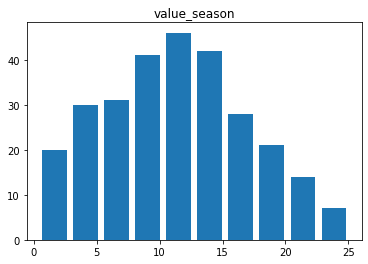

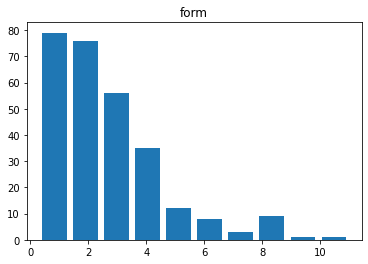

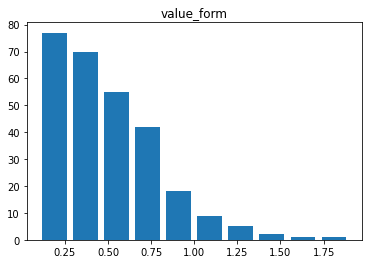

In [14]:
# Getting a feeling for distribution
fpl.getPlayerDf().hist(column='value_season', bins=10, grid=False, rwidth=.8)
fpl.getPlayerDf().hist(column='form', bins=10, grid=False, rwidth=.8)
fpl.getPlayerDf().hist(column='value_form', bins=10, grid=False, rwidth=.8)